In [1]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings

warnings.filterwarnings("ignore")




In [3]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\cover_type (1).csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen


In [4]:
df.shape

(145890, 55)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum().any()

np.False_

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           145890 non-null  int64  
 1   Aspect                              145890 non-null  int64  
 2   Slope                               145890 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    145890 non-null  int64  
 4   Vertical_Distance_To_Hydrology      145890 non-null  int64  
 5   Horizontal_Distance_To_Roadways     145890 non-null  int64  
 6   Hillshade_9am                       145890 non-null  int64  
 7   Hillshade_Noon                      145890 non-null  int64  
 8   Hillshade_3pm                       145890 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  int64  
 10  Wilderness_Area_1                   145890 non-null  float64
 11  Wilderness_Area_2         

In [8]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
count,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,...,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000
mean,2874.458949,141.127418,11.925574,251.824738,34.554322,3313.827541,217.368106,224.874748,139.788203,3044.958105,...,0.002276,0.004730,0.004222,0.000151,0.000699,0.000069,0.000233,0.005504,0.008294,0.005045
std,210.801279,107.719296,6.319326,192.473899,41.215776,1687.779953,21.590298,16.084851,31.311690,1761.882341,...,0.047650,0.068609,0.064843,0.012279,0.026432,0.008279,0.015264,0.073986,0.090693,0.070848
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2747.000000,54.000000,7.000000,95.000000,7.000000,1848.000000,207.000000,216.000000,121.000000,1608.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2909.000000,108.000000,11.000000,212.000000,23.000000,3420.000000,222.000000,226.000000,140.000000,2713.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3004.000000,217.000000,15.000000,362.000000,51.000000,4673.000000,232.000000,236.000000,159.000000,4478.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3849.000000,360.000000,61.000000,1343.000000,554.000000,7117.000000,254.000000,254.000000,248.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df['Cover_Type'].value_counts()

Cover_Type
Lodgepole Pine       103071
Spruce/Fir            31110
Aspen                  3069
Krummholz              2160
Ponderosa Pine         2160
Douglas-fir            2160
Cottonwood/Willow      2160
Name: count, dtype: int64

In [10]:
numeric_cols = [
    "Elevation", "Aspect", "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]


In [11]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [12]:
# Handle skewness

for col in numeric_cols:
    if df[col].skew() > 0.75:
        df[col] = np.log1p(df[col])


In [13]:
df['Hydro_Ratio'] = df['Vertical_Distance_To_Hydrology'] / (df['Horizontal_Distance_To_Hydrology']+1)
df['Shade_Diff'] = df['Hillshade_3pm'] - df['Hillshade_9am']


In [14]:
le = LabelEncoder()
df['Cover_Type'] = le.fit_transform(df['Cover_Type'])


In [15]:
import pickle
pickle.dump(le, open("cover_type_encoder.pkl", "wb"))


In [16]:

# 2. Check which columns contain inf or -inf
print("Columns containing ±inf values:")
print(df[numeric_cols].isin([np.inf, -np.inf]).any())

print("\nRows containing ±inf values:")
print(df[df[numeric_cols].isin([np.inf, -np.inf]).any(axis=1)])

# 3. Clean the infinities

# Replace inf/-inf with NaN
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

# Force numeric conversion (anything invalid → NaN)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Drop rows that still contain NaN
df = df.dropna(subset=numeric_cols).reset_index(drop=True)





Columns containing ±inf values:
Elevation                             False
Aspect                                False
Slope                                 False
Horizontal_Distance_To_Hydrology      False
Vertical_Distance_To_Hydrology         True
Horizontal_Distance_To_Roadways       False
Hillshade_9am                         False
Hillshade_Noon                        False
Hillshade_3pm                         False
Horizontal_Distance_To_Fire_Points    False
dtype: bool

Rows containing ±inf values:
        Elevation    Aspect  Slope  Horizontal_Distance_To_Hydrology  \
4            2595  3.828641      2                               153   
16           2610  5.560682      1                               120   
181          2755  5.771441      4                                30   
458          2715  5.318120      5                               124   
523          2599  4.499810     10                                30   
...           ...       ...    ...                    

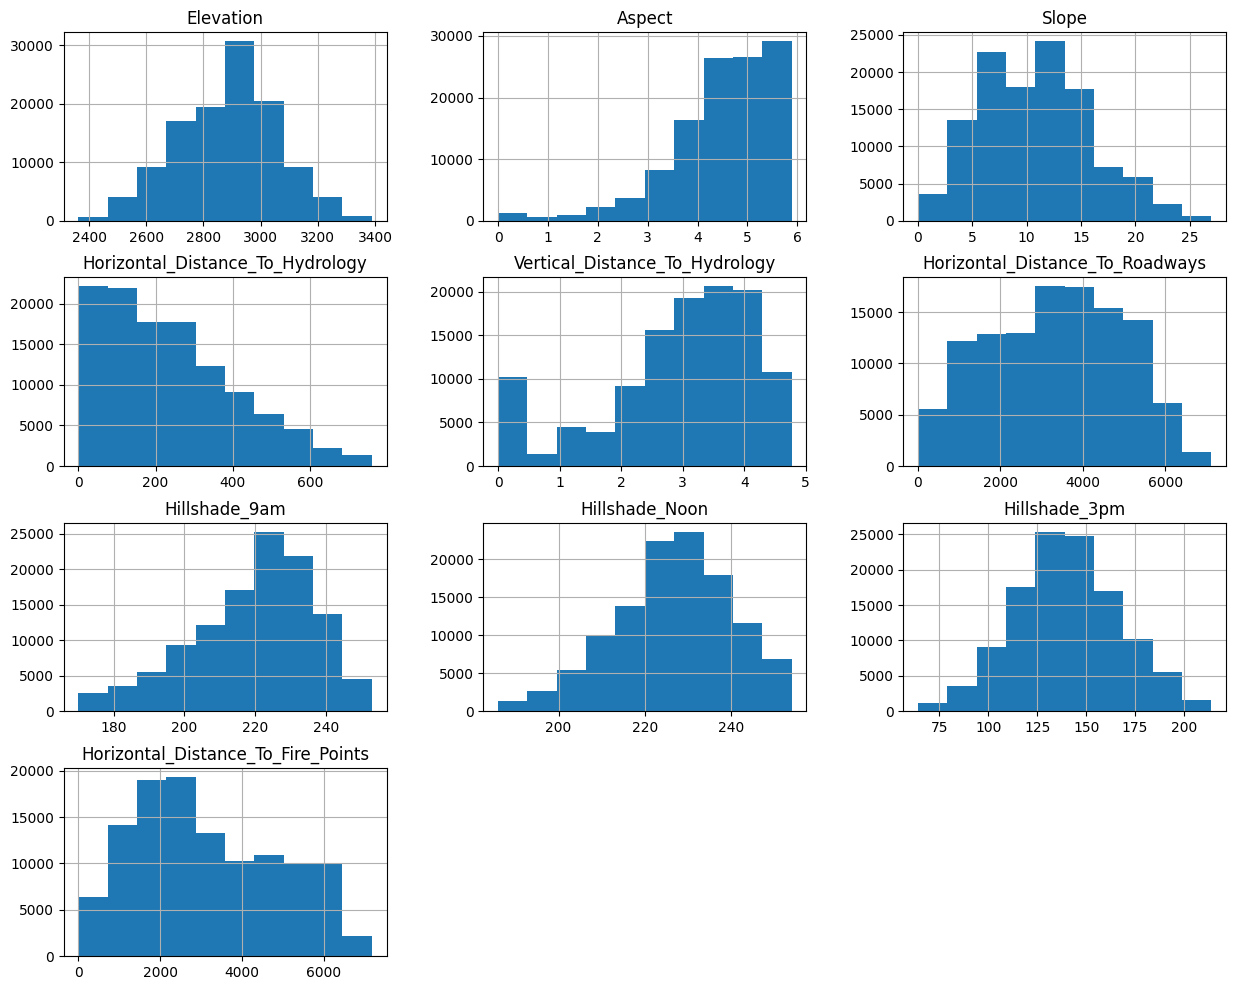

In [17]:

# Histogram for numeric features
df[numeric_cols].hist(figsize=(15,12))
plt.show()



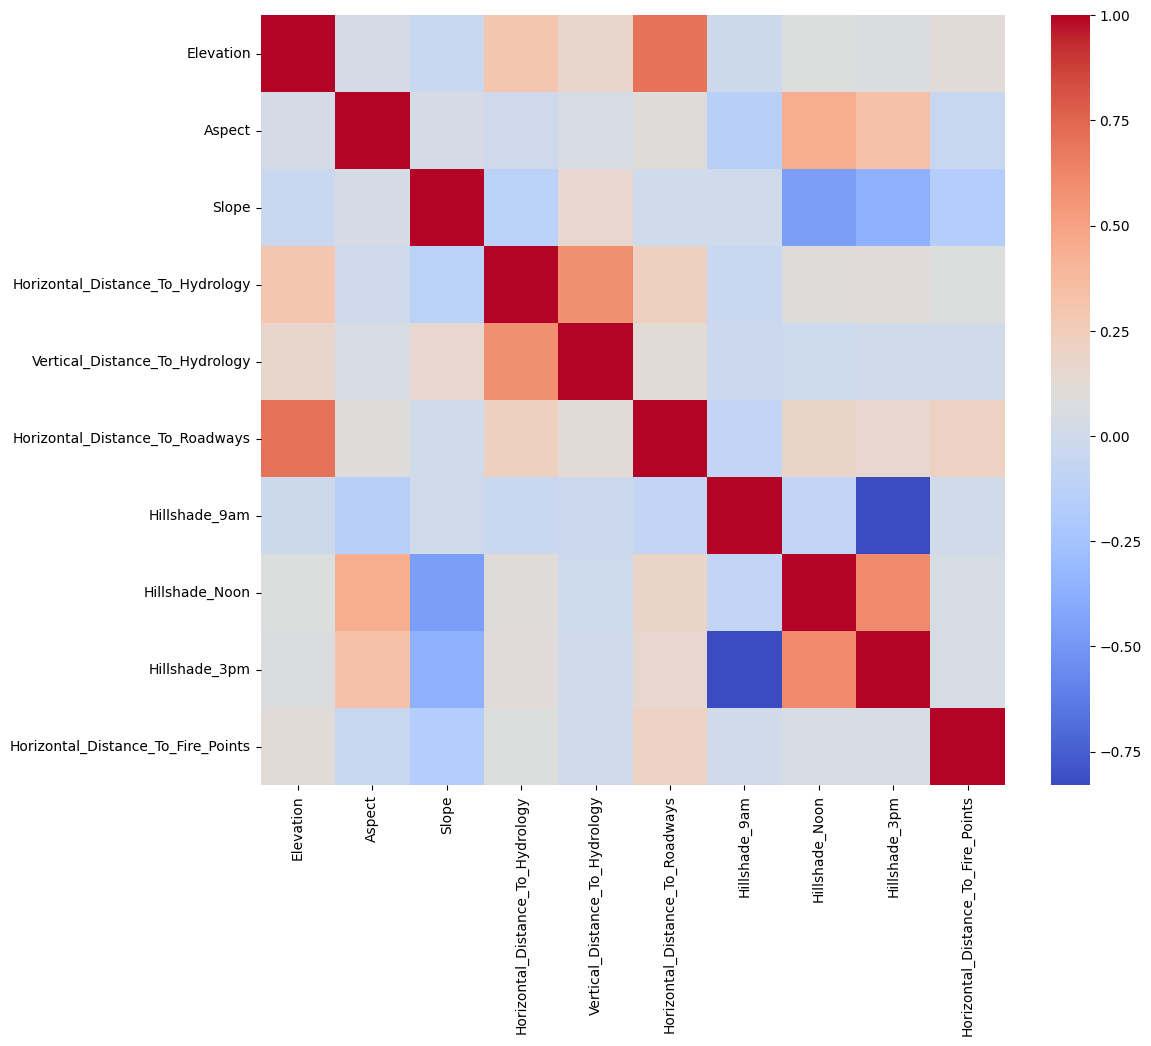

In [19]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm', annot=False)
plt.show()



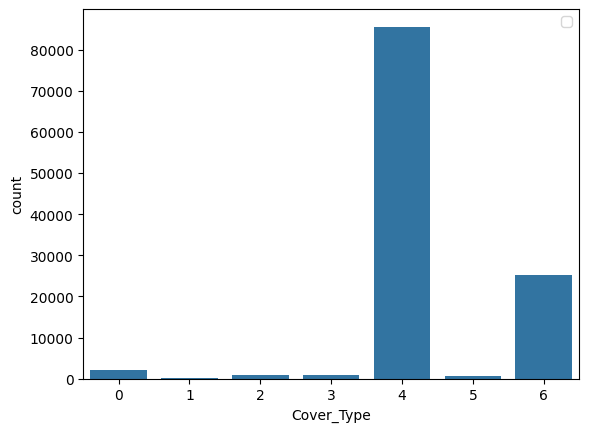

In [ ]:
# Class distribution
sns.countplot(x='Cover_Type', data=df)
plt.show()


In [24]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('smote', SMOTE(random_state=42))
])

X_res, y_res = pipeline.fit_resample(X, y)


In [33]:
X_res = pd.DataFrame(X_res, columns=X.columns)


In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_res, y_res)

importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_res.columns,
    'Importance': importances
})

feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance_df


,Feature,Importance
0,Elevation,0.206521
5,Horizontal_Distance_To_Roadways,0.097899
9,Horizontal_Distance_To_Fire_Points,0.087553
3,Horizontal_Distance_To_Hydrology,0.057324
10,Wilderness_Area_1,0.054574
13,Wilderness_Area_4,0.043233
4,Vertical_Distance_To_Hydrology,0.042200
12,Wilderness_Area_3,0.038008
54,Hydro_Ratio,0.031105
1,Aspect,0.029051


In [28]:
from sklearn.ensemble import RandomForestClassifier
importances = RandomForestClassifier(random_state=42).fit(X_res, y_res).feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_res.columns, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [35]:
!pip install xgboost



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.9927
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17066
           1       1.00      1.00      1.00     17053
           2       1.00      1.00      1.00     17276
           3       1.00      1.00      1.00     17136
           4       0.98      0.97      0.98     17166
           5       1.00      1.00      1.00     17027
           6       0.97      0.98      0.98     17081

    accuracy                           0.99    119805
   macro avg       0.99      0.99      0.99    119805
weighted avg       0.99      0.99      0.99    119805

Decision Tree Accuracy: 0.9885
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17066
           1       1.00      1.00      1.00     17053
           2       1.00      1.00      1.00     17276
           3       1.00      1.00      1.00     17136
           4       0.97      0.96      0.97     17166
           5    

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
best_model = grid.best_estimator_


In [1]:
import pickle

In [2]:
pickle.dump(best_model, open("forest_cover_model.pkl", "wb"))


NameError: name 'best_model' is not defined